# Assignment 5: Prediction by Regression

Description

In the file china_gdp.csv you will find historic data about the development of China's gross domestic product (GDP).

Your task is to train a model that fits to the data and use the model for prediction of the GDP values of years 2010, 2020, and 2022.


Please, submit a Python solution and elaborate on the following questions related to it:

1. What type/s of regression have you applied?

2. Which were the challenges?

3. How accurate is your solution?

4. What else could be done for improvement of the accuracy?

#### 1. Linear and Polynomial Regression

#### 2. To figure out how to predict the future values

#### 3. This is written under every model

#### 4. We could have made use of cross-validation

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm

## Enter the data

In [2]:
# Enter data
df = pd.read_csv('./china_gdp.csv')

In [3]:
#display the first 5 rows
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [41]:
df.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


In [4]:
# See the shape (number rows) and size (number of columns)
df.shape

(55, 2)

## Study the data

In [5]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### Preprocessing the data

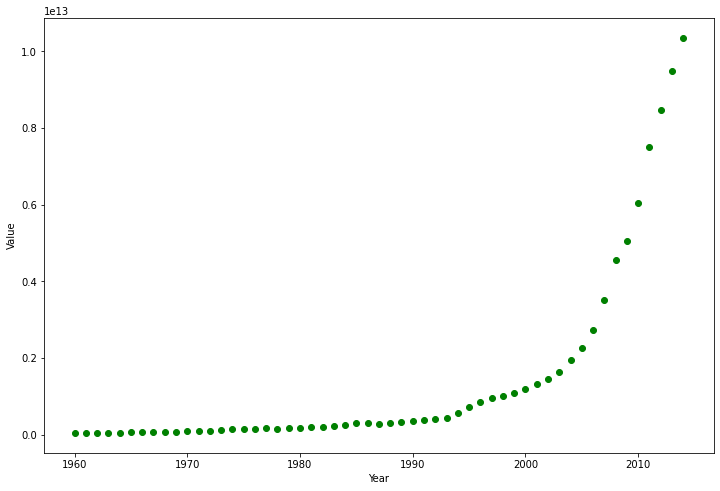

In [6]:
# plot the data

plt.figure(figsize=(12,8))
plt.ylabel('Value')
plt.xlabel('Year')
plt.scatter(df.Year, df.Value, color='green')


In [8]:
lin_fit = np.poly1d(np.polyfit(df['Year'], df['Value'],1))

In [9]:
def calculate_value(year):
    return lin_fit(year)

### Calculating for the Years 2010, 2020, 2022

In [10]:
# Year 2010
calculate_value(2010)

4035114903803.4688

In [11]:
# Year 2020
calculate_value(2020)

5164711898506.0

In [12]:
# Year 2022
calculate_value(2022)

5390631297446.531

# Splitting the dataset into the Training set and Test set

In [13]:
# split x and y
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

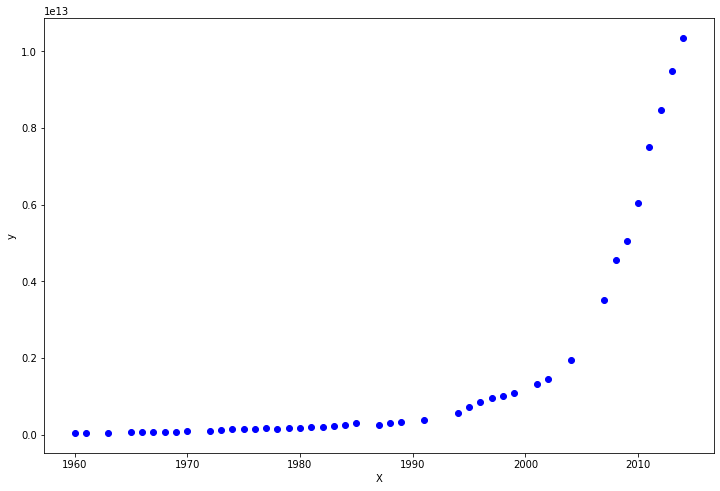

In [15]:
#Showing the training plots
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Creating a Linear regression model

In [16]:
# Create linear regression Object
regressor = LinearRegression()

#Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

## Test the model

In [45]:
# Predict the output
y_predict = regressor.predict(X)
y_predict

array([-1.86060263e+12, -1.73159978e+12, -1.60259693e+12, -1.47359407e+12,
       -1.34459122e+12, -1.21558837e+12, -1.08658552e+12, -9.57582663e+11,
       -8.28579811e+11, -6.99576958e+11, -5.70574105e+11, -4.41571253e+11,
       -3.12568400e+11, -1.83565547e+11, -5.45626945e+10,  7.44401582e+10,
        2.03443011e+11,  3.32445864e+11,  4.61448716e+11,  5.90451569e+11,
        7.19454422e+11,  8.48457275e+11,  9.77460127e+11,  1.10646298e+12,
        1.23546583e+12,  1.36446869e+12,  1.49347154e+12,  1.62247439e+12,
        1.75147724e+12,  1.88048010e+12,  2.00948295e+12,  2.13848580e+12,
        2.26748865e+12,  2.39649151e+12,  2.52549436e+12,  2.65449721e+12,
        2.78350007e+12,  2.91250292e+12,  3.04150577e+12,  3.17050862e+12,
        3.29951148e+12,  3.42851433e+12,  3.55751718e+12,  3.68652003e+12,
        3.81552289e+12,  3.94452574e+12,  4.07352859e+12,  4.20253145e+12,
        4.33153430e+12,  4.46053715e+12,  4.58954000e+12,  4.71854286e+12,
        4.84754571e+12,  

In [18]:
# Calculate a score associated with the model
regressor.score(X_test, y_test)

-2.264658016332367

# Well that's shit!
***

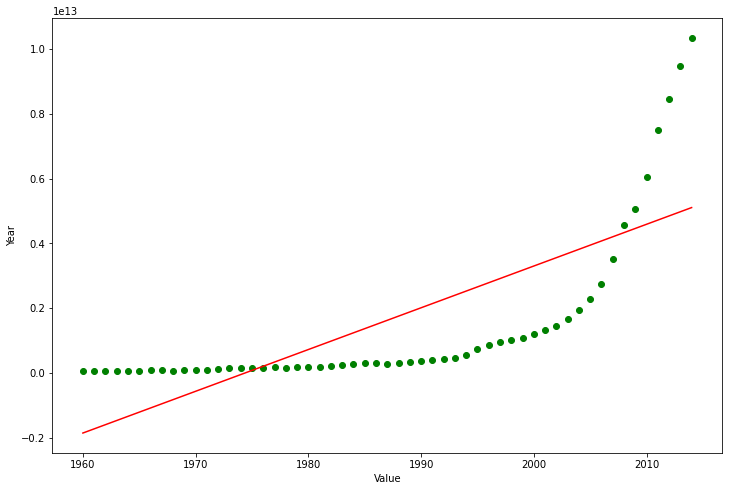

In [19]:
# Visualizing the Linear Regression results

plt.figure(figsize=(12,8))
plt.scatter(X, y, color='green')
plt.plot(X, y_predict, color='red')
plt.xlabel('Value')
plt.ylabel('Year')
plt.show()

# Validate the accuracy

In [20]:
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y, y_predict), 2))
print("Mean squared error =", round(sm.mean_squared_error(y, y_predict), 2))
print("Median absolute error =", round(sm.median_absolute_error(y, y_predict), 2))
print("Explain variance score =", round(sm.explained_variance_score(y, y_predict), 2))
print("R2 score =", round(sm.r2_score(y, y_predict), 2))
print("Accuracy = ", int(round(sm.explained_variance_score(y, y_predict), 2)*100), "%" )

Linear regressor performance:
Mean absolute error = 1425063764345.96
Mean squared error = 3.020531610980459e+24
Median absolute error = 1403653476514.03
Explain variance score = 0.51
R2 score = 0.51
Accuracy =  51 %


### This is not good...

***

## Polynomial Regression model

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X)

#Creating Linear regression
pol_lin_reg = LinearRegression()
pol_lin_reg.fit(X_poly, y)

LinearRegression()

In [22]:
# Apply model to new training
y_predict_poly = pol_lin_reg.predict(X_poly)
y_predict_poly

array([-6.99853251e+11, -4.62561572e+11, -2.55301622e+11, -7.64772326e+10,
        7.55102562e+10,  2.02261986e+11,  3.05381590e+11,  3.86475185e+11,
        4.47151377e+11,  4.89021258e+11,  5.13698406e+11,  5.22798889e+11,
        5.17941259e+11,  5.00746556e+11,  4.72838310e+11,  4.35842531e+11,
        3.91387723e+11,  3.41104874e+11,  2.86627457e+11,  2.29591438e+11,
        1.71635262e+11,  1.14399868e+11,  5.95286788e+10,  8.66760461e+09,
       -3.65349576e+10, -7.44281236e+10, -1.03358522e+11, -1.21670294e+11,
       -1.27705096e+11, -1.19802094e+11, -9.62979706e+10, -5.55269176e+10,
        4.17935750e+09,  8.44916348e+10,  1.87083182e+11,  3.13629752e+11,
        4.65809588e+11,  6.45303417e+11,  8.53794454e+11,  1.09296840e+12,
        1.36451345e+12,  1.67012028e+12,  2.01148204e+12,  2.39029440e+12,
        2.80825548e+12,  3.26706592e+12,  3.76842881e+12,  4.31404977e+12,
        4.90563688e+12,  5.54490070e+12,  6.23355431e+12,  6.97331323e+12,
        7.76589552e+12,  

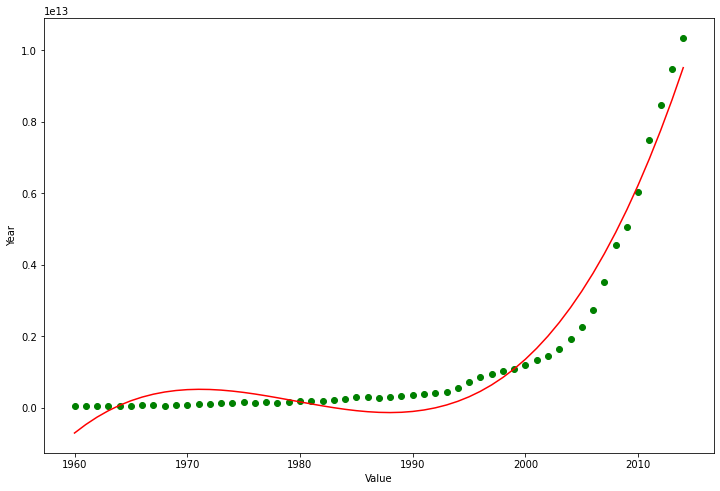

In [23]:
# Visualizing the Polymonial Regression results

plt.figure(figsize=(12,8))
plt.scatter(X, y, color='green')
plt.plot(X, y_predict_poly, color='red')
plt.xlabel('Value')
plt.ylabel('Year')

plt.show()

In [24]:
print("Polynomial Regression performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y, y_predict_poly), 2))
print("Mean squared error =", round(sm.mean_squared_error(y, y_predict_poly), 2))
print("Median absolute error =", round(sm.median_absolute_error(y, y_predict_poly), 2))
print("Explain variance score =", round(sm.explained_variance_score(y, y_predict_poly), 2))
print("R2 score =", round(sm.r2_score(y, y_predict_poly), 2))
print("Accuracy = ", int(round(sm.explained_variance_score(y, y_predict_poly), 2)*100), "%" )

Polynomial Regression performance:
Mean absolute error = 393203235650.78
Mean squared error = 2.140494431577487e+23
Median absolute error = 377157878939.69
Explain variance score = 0.97
R2 score = 0.97
Accuracy =  97 %


### Predicting with polynomial model

In [50]:
temp = pol_lin_reg.predict(poly_reg.fit_transform([[2000]]))

"{:.0f}".format(float(temp))

'1364513452992'

In [52]:
def poly_predict_value(year):
    y_pre_val = pol_lin_reg.predict(poly_reg.fit_transform([[year]]))
    return "{:.0f}".format(float(y_pre_val))

In [56]:
# Year 2010
poly_predict_value(2010)

'6233554306496'

In [57]:
# Year 2020
poly_predict_value(2020)

'16215179397824'

In [58]:
# Year 2022
poly_predict_value(2022)

'18976748596928'

***

1. What type/s of regression have you applied?

2. Which were the challenges?

3. How accurate is your solution?

3. What else could be done for improvement of the accuracy?

4. This is a group project.

5. The solution brings two more study points to your collection.

***

# Trying Sigmoidal model

## Building the model

In [25]:
x1, y1 = (df["Year"].values, df["Value"].values)

In [26]:
def sigmoid(x, Beta_1, Beta_2):
    res = 1 / (1+ np.exp(-Beta_1*(x-Beta_2)))
    return res

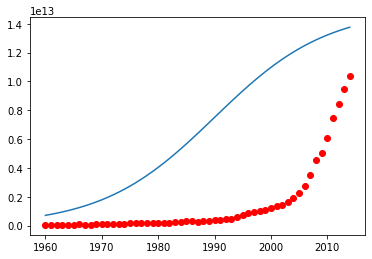

In [27]:
beta_1 = 0.10
beta_2 = 1990

#logistic function
y_pred = sigmoid(x1, beta_1, beta_2)

#print(y_pred)
#plot initial prediction against datapoints
plt.plot(x1, (y_pred*15000000000000.))
plt.plot(x1, y1, 'ro')

## Normalize the data

In [28]:
x_norm = x1/max(x1)
y_norm = y1/max(y1)

In [29]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


C:\Users\Nmtur\AppData\Local\Temp\ipykernel_20712\1656103471.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_norm, y_norm, 'ro', color='r')


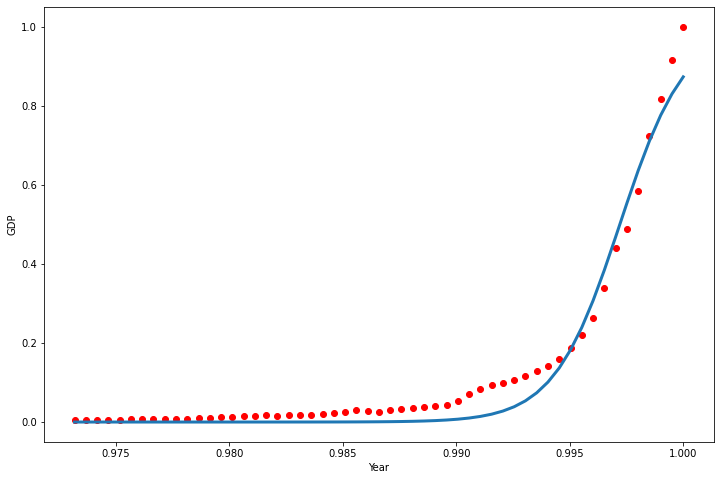

In [30]:
# Plotting result
x1 = x1/max(x1)

plt.figure(figsize=(12,8))
y = sigmoid(x1, *popt)
plt.plot(x_norm, y_norm, 'ro', color='r')
plt.plot(x1, y, linewidth=3.0)
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [31]:
# write your code here
msk = np.random.rand(len(df)) < 0.8
train_x = x_norm[msk]
test_x = x_norm[~msk]
train_y = y_norm[msk]
test_y = y_norm[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.25
Residual sum of squares (MSE): 0.18
R2-score: -311899727892823589826119757852917628928.00


C:\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [32]:
print("Polynomial Regression performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y, y_norm), 2))
print("Mean squared error =", round(sm.mean_squared_error(y, y_norm), 2))
print("Median absolute error =", round(sm.median_absolute_error(y, y_norm), 2))
print("Explain variance score =", round(sm.explained_variance_score(y, y_norm), 2))
print(round(sm.r2_score(y, y_norm),2))

Polynomial Regression performance:
Mean absolute error = 0.03
Mean squared error = 0.0
Median absolute error = 0.02
Explain variance score = 0.98
0.97
